> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. In order to work with the data in this workspace, you also need to upload it to the workspace. To do so, click on the jupyter icon in the upper left to be taken back to the workspace directory. There should be an 'Upload' button in the upper right that will let you add your data file(s) to the workspace. You can then click on the .ipynb file name to come back here.

In [2]:
## load all need library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Magic Word
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [19]:
# import data set
df = pd.read_csv('tmdb-movies.csv')

# show first five column 
df.head(3)


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022F9AF09048>,
      dtype=object)

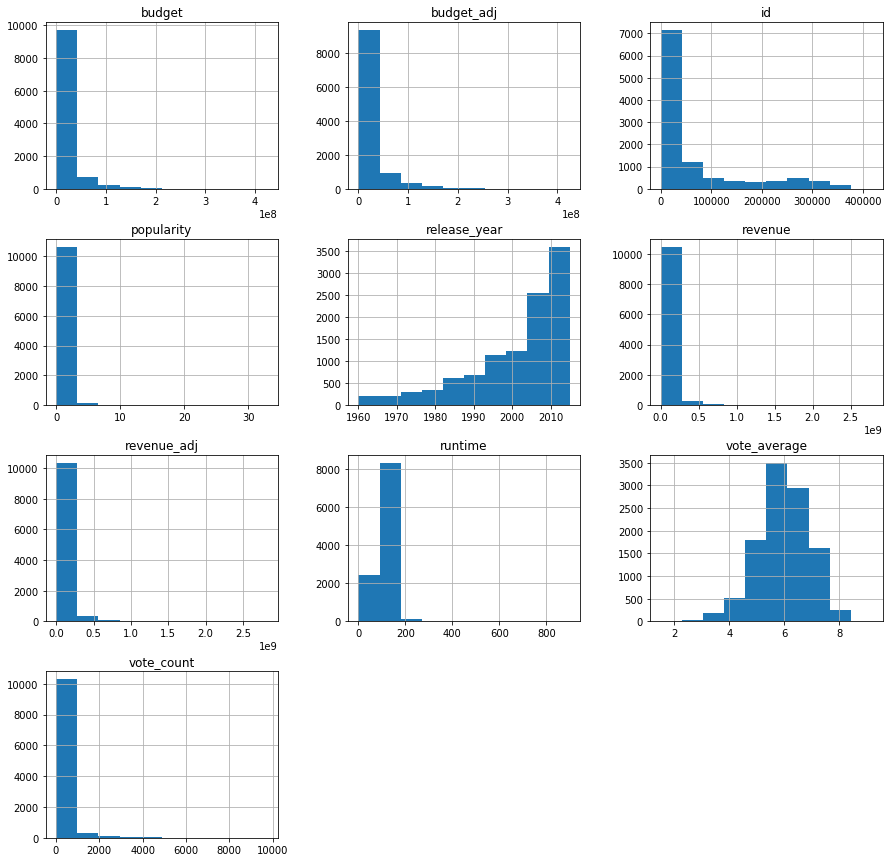

In [11]:
df.hist(figsize=(15, 15))

In [12]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [18]:
#replace data Nunvalue by mean
df_rev_adj =df['revenue_adj'].mean()
df['revenue_adj'].fillna(value=df_rev_adj, inplace=True)
df_rev = df['revenue'].mean()
df['revenue'].fillna(value=df_rev, inplace=True)
df_budget_adj = df['budget_adj'].mean()
df['budget_adj'].fillna(value=df_budget_adj, inplace=True)
df_bud = df['budget'].mean()
df['budget'].fillna(value=df_bud, inplace=True)
df_runtime = df['runtime'].mean()
df['runtime'].fillna(value=df_runtime, inplace=True)

df.info()

df.dropna(axis = 0, inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [20]:
#seperate columns have several value

df_cast = (df['cast'].str.split('|', expand=True).rename(columns=lambda x: f"cast_{x+1}"))
df_dir = (df['director'].str.split('|', expand=True).rename(columns=lambda x: f"director_{x+1}"))
df_key = (df['keywords'].str.split('|', expand=True).rename(columns=lambda x: f"keywords_{x+1}"))
df_gen = (df['genres'].str.split('|', expand=True).rename(columns=lambda x: f"genres_{x+1}"))
df_prod = (df['production_companies'].str.split('|', expand=True).rename(columns=lambda x: f"production_companies_{x+1}"))


In [22]:
df = df.join([df_cast, df_dir, df_key, df_gen, df_prod])
df = df.drop(['cast', 'keywords', 'director', 'genres', 'production_companies', 'imdb_id', 'homepage', 'overview', 'release_date', 'tagline'], axis=1)

In [24]:
## show your new data
df.head()

,id,popularity,budget,revenue,original_title,runtime,vote_count,vote_average,release_year,budget_adj,...,genres_1,genres_2,genres_3,genres_4,genres_5,production_companies_1,production_companies_2,production_companies_3,production_companies_4,production_companies_5
0,135397,32.985763,150000000,1513528810,Jurassic World,124,5562,6.5,2015,1.379999e+08,...,Action,Adventure,Science Fiction,Thriller,None,Universal Studios,Amblin Entertainment,Legendary Pictures,Fuji Television Network,Dentsu
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,120,6185,7.1,2015,1.379999e+08,...,Action,Adventure,Science Fiction,Thriller,None,Village Roadshow Pictures,Kennedy Miller Productions,None,None,None
2,262500,13.112507,110000000,295238201,Insurgent,119,2480,6.3,2015,1.012000e+08,...,Adventure,Science Fiction,Thriller,None,None,Summit Entertainment,Mandeville Films,Red Wagon Entertainment,NeoReel,None
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,5292,7.5,2015,1.839999e+08,...,Action,Adventure,Science Fiction,Fantasy,None,Lucasfilm,Truenorth Productions,Bad Robot,None,None
4,168259,9.335014,190000000,1506249360,Furious 7,137,2947,7.3,2015,1.747999e+08,...,Action,Crime,Thriller,None,None,Universal Pictures,Original Film,Media Rights Capital,Dentsu,One Race Films


In [26]:
## check duplicate rows

df.duplicated().sum()


1

In [28]:
df.drop_duplicates(inplace = True)
df.duplicated().sum()

0

In [31]:
df.dtypes

id                          int64
popularity                float64
budget                      int64
revenue                     int64
original_title             object
                           ...   
production_companies_1     object
production_companies_2     object
production_companies_3     object
production_companies_4     object
production_companies_5     object
Length: 67, dtype: object

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 ( Which genres are most popular from year to year?)

In [32]:
# select geners columns
df_genres = df.loc[:, 'genres_1': 'genres_5' ]

#add release_year
df_genres_dates = df_genres.join(df['release_year'])

In [35]:
#creates an array of years mentioned in release year
years = df_genres_dates['release_year'].unique() 
#creates a list
common = [] 

#for loop to create most_common list
for year in years:
    #creates df filtered by every year mentioned in years
    a = df_genres_dates[df_genres_dates['release_year'] == year] 
    #drops columns "release_year to perferm stack value count in next line
    b = a.drop(['release_year'], axis = 1)
    #performs value count trough genres_1 - genres_5 and stores the index of maximum count
    c = b.stack().value_counts().idxmax() 

    #creates a masked DataFrame for respective years
    x = df[df['release_year'] == year]
    #creates the mean of vote_average and stores the index of maximum value
    y = x.groupby(['genres_1'])['vote_average'].mean().idxmax()
    if c == y:
        z = 'Equal'
    else:
        z = 'Not equal'
        #appends year with value count trough genres_1 - genres_5, the highest average vote_average and indicates if the resulting columns match
    common.append((year, c, y, z))

#creates df for list of tuples named most_common
df_most_popular = pd.DataFrame(common, columns=['release_year', 'popular_produced_genre', 'popular_voted_gerne', 'is_equal']).sort_values('release_year').reset_index().drop(['index'], axis=1)
df_most_popular

,release_year,popular_produced_genre,popular_voted_gerne,is_equal
0,1960,Drama,Drama,Equal
1,1961,Drama,Science Fiction,Not equal
2,1962,Drama,Mystery,Not equal
3,1963,Drama,Animation,Not equal
4,1964,Drama,Thriller,Not equal
5,1965,Drama,Animation,Not equal
6,1966,Drama,Animation,Not equal
7,1967,Comedy,Crime,Not equal
8,1968,Drama,Romance,Not equal
9,1969,Drama,History,Not equal


In [36]:
df_most_popular['is_equal'].value_counts()

Not equal    53
Equal         3
Name: is_equal, dtype: int64

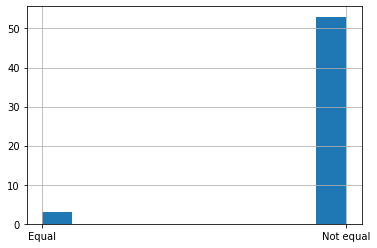

In [54]:
df_most_popular['is_equal'].hist()

### Research Question 2  (What kinds of properties are associated with movies that have high revenues?)

In [37]:
#copy original data
df_revenue = df

In [38]:
df_revenue['revenue_adj'].describe()

count    1.086500e+04
mean     5.136900e+07
std      1.446383e+08
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      3.370173e+07
max      2.827124e+09
Name: revenue_adj, dtype: float64

In [39]:
# create data by his statisitcs description
bin_edges = [2.37,10465848.09,43956661.16,131648235.91,2827123750.41]
bin_names = ['very low' ,'low' ,'medium' ,'high' ] 
df_revenue['revenue_level'] = pd.cut(df_revenue['revenue_adj'], bin_edges, labels=bin_names)

In [43]:
df_revenue['revenue_level'].unique()
revenue_levels = df_revenue['revenue_level'].unique().tolist()
del revenue_levels[-1]

In [51]:
movie_data = {}

for level in revenue_levels:
    
    #stack.value_counts seciton
    grouped_data = df_revenue[df_revenue['revenue_level'] == level]
        #director
    director = grouped_data.loc[:, 'director_1': 'director_6']
    frequent_director = director.stack().value_counts()
        #cast
    cast = grouped_data.loc[:, 'cast_1': 'cast_5']
    frequent_cast = cast.stack().value_counts()
        #genres
    genres = grouped_data.loc[:, 'genres_1': 'genres_5']
    frequent_genres = genres.stack().value_counts()
        #production companies
    production = grouped_data.loc[:, 'production_companies_1': 'production_companies_5']
    frequent_production = production.stack().value_counts()
        #release_year
    release_year = grouped_data['release_year'].value_counts()
    
    #average section
    avg_duration = grouped_data['runtime'].mean()
    avg_budget = grouped_data['budget_adj'].mean()
    avg_vote = grouped_data['vote_average'].mean()
    
    #creating nested dictionary
    movie_data[level] = {'avg_duration' : avg_duration, 
                         'frequent_director' : frequent_director, 
                         'avg_budget' : avg_budget, 
                         'avg_vote' : avg_vote,
                        'frequent_cast' : frequent_cast,
                        'frequent_genres' : frequent_genres,
                        'release_year' : release_year,
                        'frequent_production_companies' : frequent_production}

In [52]:
movie_classes = []
frames = []

for movie_class, d in movie_data.items():
    movie_classes.append(movie_class)
    frames.append(pd.DataFrame.from_dict(d, orient='index'))
    
properties = pd.concat(frames, keys=movie_classes)  

properties.columns = ['values']
properties

values
high   avg_duration                                                             116.408
       frequent_director              Steven Spielberg    23
Robert Zemeckis     13
...
       avg_budget                                                            7.7334e+07
       avg_vote                                                                 6.41931
       frequent_cast                  Tom Cruise                    27
Brad Pitt    ...
       frequent_genres                Action             468
Drama              436
...
       release_year                   2011    56
2014    52
2010    50
2013    47
20...
       frequent_production_companies  Universal Pictures                        156
...
low    avg_duration                                                             105.084
       frequent_director              Woody Allen            10
Wes Craven          ...
       avg_budget                                                           2.10617e+07
       avg_vote                                                                 5.99406
       frequent_cast                  Robert De Niro         14
Dennis Quaid        ...
       frequent_genres                Drama              604
Comedy             446
...
       release_year                   2007    55
2006    53
2009    52
2008    52
20...
       frequent_production_companies  Universal Pictures                   84
Paramo...
medium avg_duration                                                              108.82
       frequent_director              Clint Eastwood      14
Ridley Scott         8
...
       avg_budget                                                           3.49236e+07
       avg_vote                                                                 6.16168
       frequent_cast                  Robert De Niro      18
Bruce Willis        16
...
       frequent_genres                Drama              541
Comedy             482
...
       release_year                   2005    59
2006    56
2015    50
2013    49
20...
       frequent_production_companies  Warner Bros.                              129
...
NaN    avg_duration                                                                 NaN
       frequent_director                                       Series([], dtype: int64)
       avg_budget                                                                   NaN
       avg_vote                                                                     NaN
       frequent_cast                                           Series([], dtype: int64)
       frequent_genres                                         Series([], dtype: int64)
       release_year                        Series([], Name: release_year, dtype: int64)
       frequent_production_companies                           Series([], dtype: int64)

In [53]:
df_revenue.corr()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,1.000000,-0.014351,-0.141341,-0.099235,-0.088368,-0.035555,-0.058391,0.511393,-0.189008,-0.138487
popularity,-0.014351,1.000000,0.545481,0.663360,0.139032,0.800828,0.209517,0.089806,0.513555,0.609085
budget,-0.141341,0.545481,1.000000,0.734928,0.191300,0.632719,0.081067,0.115904,0.968963,0.622531
revenue,-0.099235,0.663360,0.734928,1.000000,0.162830,0.791174,0.172541,0.057070,0.706446,0.919109
runtime,-0.088368,0.139032,0.191300,0.162830,1.000000,0.163273,0.156813,-0.117187,0.221127,0.175668
vote_count,-0.035555,0.800828,0.632719,0.791174,0.163273,1.000000,0.253818,0.107962,0.587062,0.707941
vote_average,-0.058391,0.209517,0.081067,0.172541,0.156813,0.253818,1.000000,-0.117576,0.093079,0.193062
release_year,0.511393,0.089806,0.115904,0.057070,-0.117187,0.107962,-0.117576,1.000000,0.016771,-0.066236
budget_adj,-0.189008,0.513555,0.968963,0.706446,0.221127,0.587062,0.093079,0.016771,1.000000,0.646627
revenue_adj,-0.138487,0.609085,0.622531,0.919109,0.175668,0.707941,0.193062,-0.066236,0.646627,1.000000


<a id='conclusions'></a>
## Conclusions

-The first research question "Which genres are most popular from year to year?" has shown surprising results, as the most popular genre differed a lot. To the authors surprise, only in 3 occasions the most frequent produced genres was also voted as best genre by the users. In all remaining 53 occasions the two values differed.

-The second research question "What kinds of properties are associated with movies that have high revenues?" shows interesting result. The numeric columns of "popularity, budget and vote_count" show the highest correlations. One can argue that movies with higher budgets are able to receive higher revenues, nevertheless, the correlation is not on a very high level. Vote_count is indicating that the more people vote for a movie, the higher the revenue is. Most probably, this is not a good indicator for high revenue movies. High revenue movies indicate that they are most commonly directed by Matt Damon, cast Tom Cruise as actor and contain the genre Action.

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [56]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295